# Course: Deep Learning
# Author: Sandro Camargo sandrocamargo@unipampa.edu.br
# MNIST Classification with ANN
# Dataset: '/content/sample_data/' mnist
# Dataset description: https://www.tensorflow.org/datasets/catalog/mnist

To open this code in your Google Colab environment, [click here](https://colab.research.google.com/github/Sandrocamargo/deep-learning/blob/master/dl_class05_mnist.ipynb).


Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Defining image parameters

In [2]:
np.random.seed(1)
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

Loading dataset from google colab

In [3]:
data_path = "/content/sample_data/"
train_data = np.loadtxt(data_path + "mnist_train_small.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",")

Scaling the inputs in [0,1] range and presenting the input and output dataset dimensions

In [4]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

Transforming arrays into images

Splitting inputs and outputs
Binarizing outputs


In [5]:
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])
print('The training dataset (input) dimensions are: ', train_imgs.shape)
print('The training dataset (output) dimensions are: ', train_labels.shape)
print('The testing dataset (input) dimensions are: ', test_imgs.shape)
print('The testing dataset (output) dimensions are: ',test_labels.shape)

train_labels_bin = label_binarize(train_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The training dataset (input) dimensions are:  (20000, 784)
The training dataset (output) dimensions are:  (20000, 1)
The testing dataset (input) dimensions are:  (10000, 784)
The testing dataset (output) dimensions are:  (10000, 1)


Inspecting the training set

Showing the first 20 samples and their labels

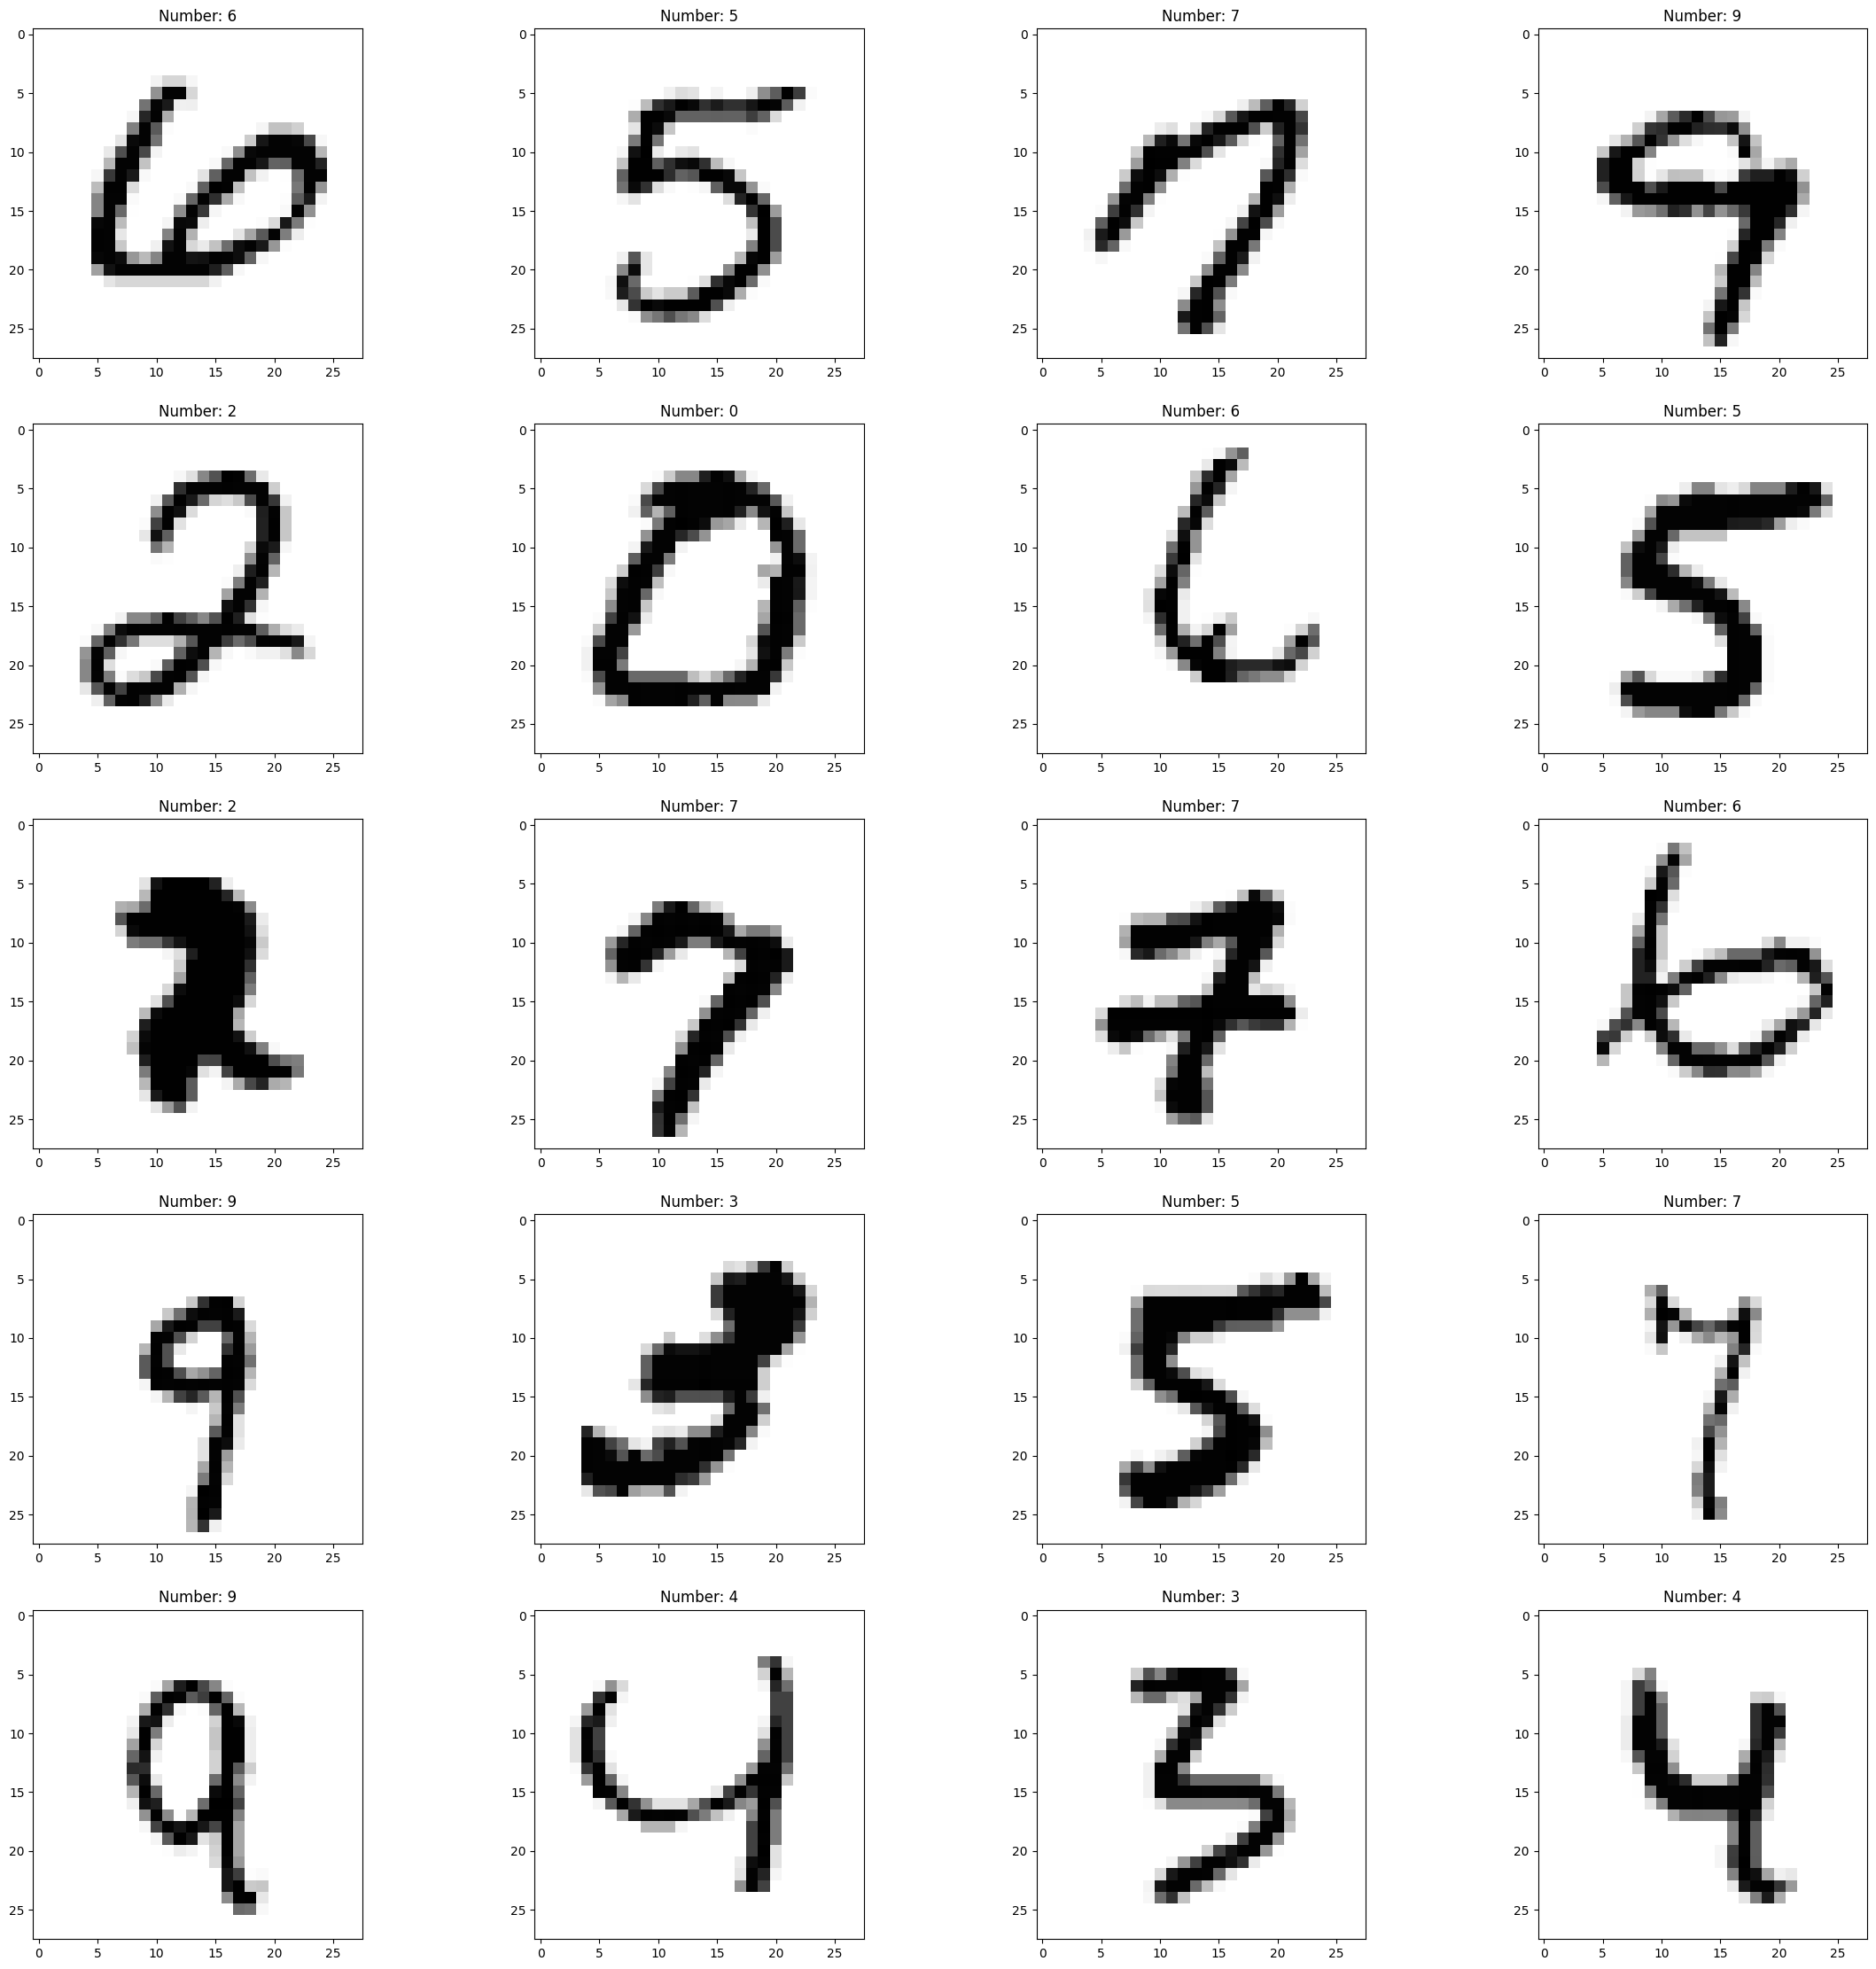

In [6]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(image_size, image_size))

for i in range(5):
  for j in range(4):
    img = train_data[i*5+j,range(1,785)].reshape((image_size,image_size))
    ax[i,j].imshow(img, cmap="Greys")
    ax[i,j].title.set_text("Number: " + str(int(train_data[i*5+j,0])))
plt.show()

Creating and training the model


In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[image_pixels]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

history = model.fit(
    train_imgs, train_labels_bin,
    epochs=20, verbose=1,
    validation_split=0.2
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8026 - loss: 0.7052 - val_categorical_accuracy: 0.9245 - val_loss: 0.2684
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.9344 - loss: 0.2248 - val_categorical_accuracy: 0.9315 - val_loss: 0.2404
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9553 - loss: 0.1631 - val_categorical_accuracy: 0.9490 - val_loss: 0.1812
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.9664 - loss: 0.1221 - val_categorical_accuracy: 0.9555 - val_loss: 0.1562
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9765 - loss: 0.0856 - val_categorical_accuracy: 0.9588 - val_loss: 0.1390
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9813 - loss: 0.0728 - val_categorical_accuracy: 0.9597 - val_loss: 0.1357
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9845 - los

Plotting the loss function on training and validation set.

The best value for epochs is when the validation loss starts to increase.

---



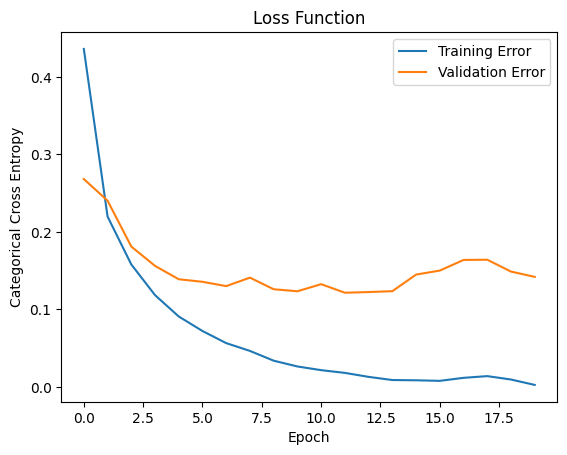

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Error','Validation Error'], loc='upper right')
plt.savefig("trainingerror.pdf")
plt.show()

Plotting the classification accuracy on training and validation sets

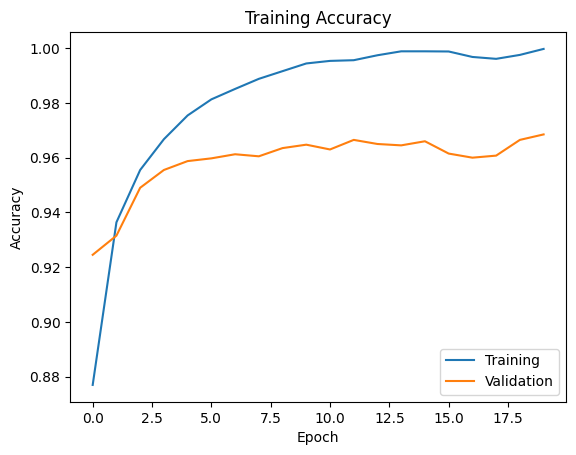

Training Categorical Accuracy: 0.9998
Validation Categorical Accuracy: 0.9685


In [9]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='lower right')
plt.savefig("trainingaccuracy.pdf")
plt.show()
print("Training Categorical Accuracy:", round(history.history['categorical_accuracy'][-1],4))
print("Validation Categorical Accuracy:", round(history.history['val_categorical_accuracy'][-1],4))

Evaluates performance on test set
Presents the classification accuracy

In [10]:
scores = model.evaluate(
    test_imgs, test_labels_bin, verbose=1
)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.9644 - loss: 0.1577
compile_metrics: 97.02%


Summarizing the performance on training set


In [11]:
test_predictions = model.predict(test_imgs)
print(confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1)))
print(classification_report(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 969    0    1    0    2    6    8    2    4    3]
 [   0 1116    1    0    0    0    3    4    1    4]
 [   0    6 1005    8    5    0    2   10    6    0]
 [   1    1    5  975    0    9    2    4    6   10]
 [   2    1    3    2  952    1    6    0    6    8]
 [   2    1    0    3    0  859    4    0    6    0]
 [   1    4    2    0    4   10  930    0    5    1]
 [   1    4   10    7    2    1    0  997    7    6]
 [   2    2    4    8    2    4    3    3  927    5]
 [   2    0    1    7   15    2    0    8    6  972]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       995
           1       0.98      0.99      0.99      1129
           2       0.97      0.96      0.97      1042
           3       0.97      0.96      0.96      1013
           4       0.97      0.97      0.97       981
           5       0.96      0.98      0.97       875
           6       0.97      0.97      0.97      

Confusion Matrix Heatmap

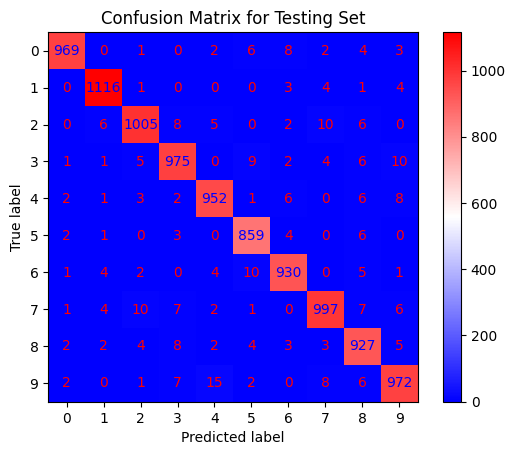

In [12]:
cm = confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
disp.plot(cmap="bwr")
plt.title('Confusion Matrix for Testing Set')
plt.savefig("confusionmatrix.pdf")
plt.show()

Reporting some misclassified samples

Real: [5.] Pred: 6 Output: [2.3520101e-07 7.3578990e-12 9.5665359e-07 8.0468316e-09 3.7382506e-09
 1.6908655e-03 9.9830741e-01 5.0304656e-15 4.9237781e-07 1.1181901e-07]
Real: [2.] Pred: 9 Output: [1.1190515e-07 7.7310015e-06 4.1579065e-01 1.2395334e-04 8.6042392e-06
 1.0184987e-03 1.0803125e-08 1.4011104e-06 7.2437615e-06 5.8304185e-01]
Real: [9.] Pred: 8 Output: [3.5345727e-06 1.7384780e-10 3.1209161e-04 1.3783700e-05 7.0419538e-11
 9.0291017e-08 2.9173727e-10 8.9716304e-11 9.7348553e-01 2.6184909e-02]
Real: [9.] Pred: 8 Output: [3.8155686e-04 6.5119985e-09 8.9277972e-05 1.6749281e-04 3.2198140e-09
 3.1035609e-04 2.4483214e-07 1.2243859e-08 6.2835634e-01 3.7069473e-01]
Real: [4.] Pred: 2 Output: [1.8304055e-10 1.4334425e-09 9.2517775e-01 1.8047133e-07 4.9255457e-04
 6.3471104e-09 7.4329451e-02 7.3270428e-08 4.5499521e-11 1.5921409e-14]
Real: [6.] Pred: 0 Output: [9.9993366e-01 9.4022636e-14 2.1389428e-11 6.1073777e-09 1.1286594e-09
 4.4968419e-06 5.0285715e-05 1.1423353e-05 1.2578238

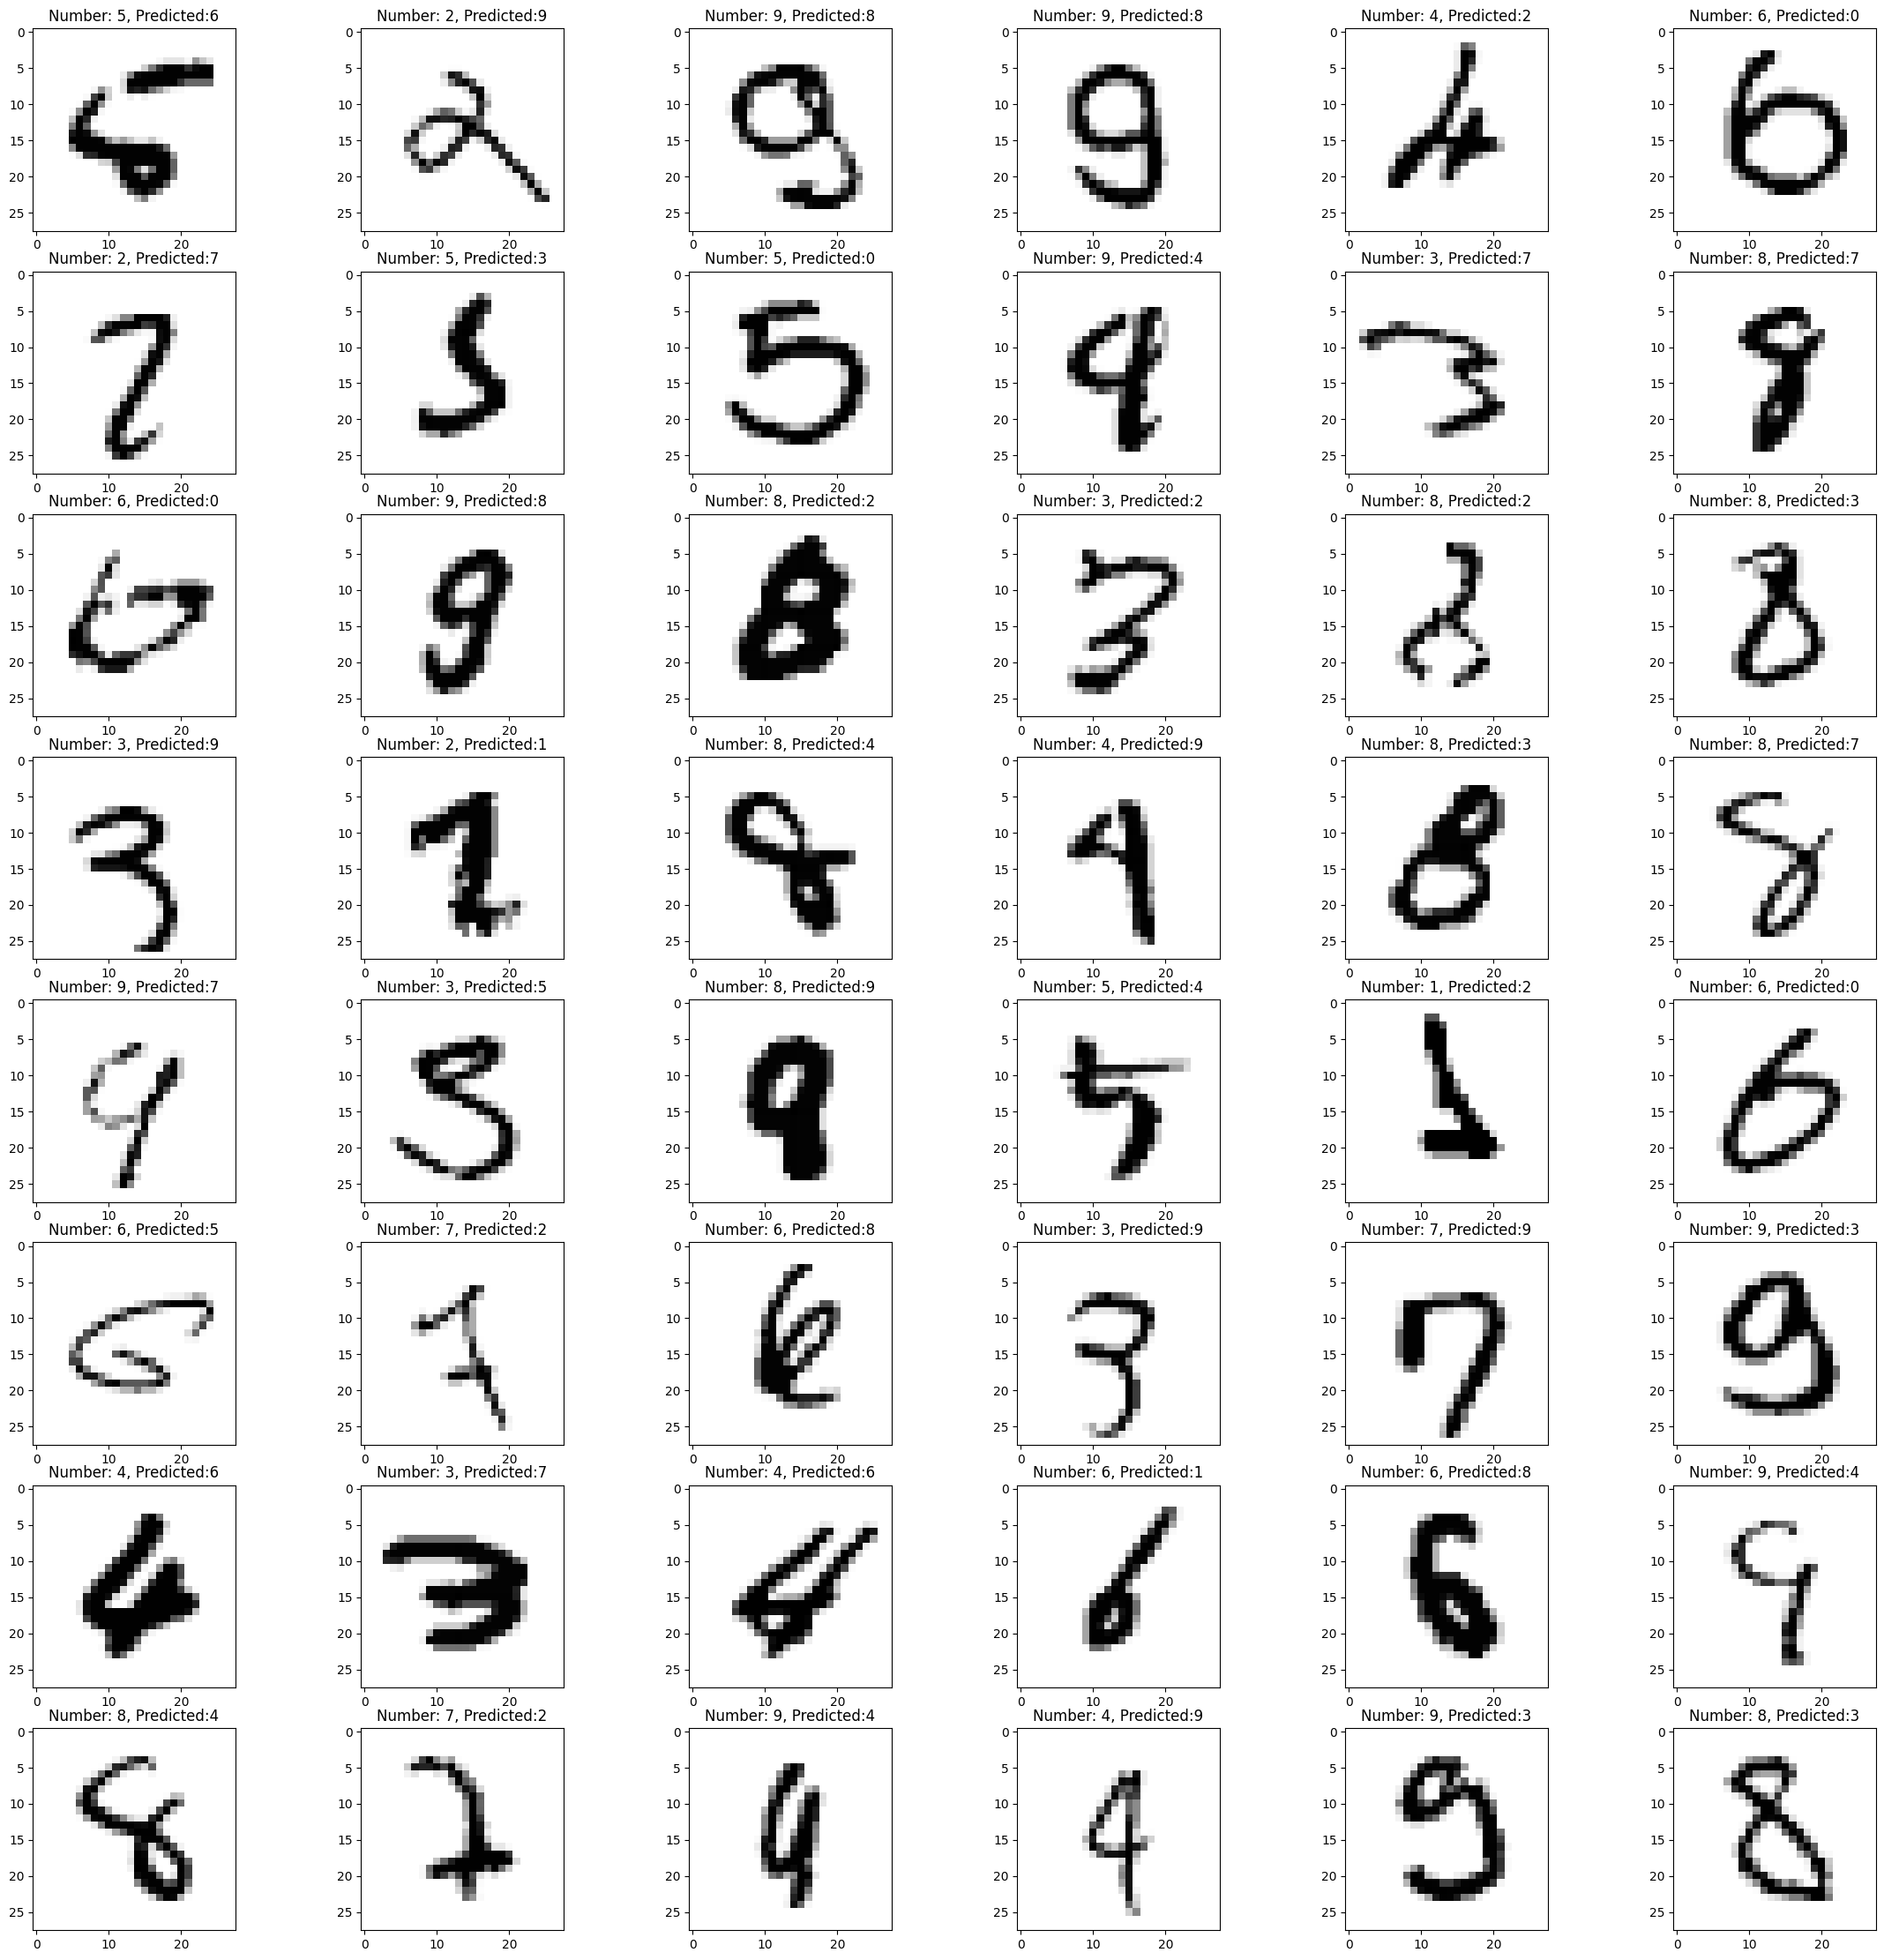

In [17]:
i = 0
j = -1

fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(image_size, image_size))

for k in range(5000):
  if test_predictions.argmax(axis=1)[k]!=test_labels_bin.argmax(axis=1)[k]:
      print("Real:",test_labels[k],"Pred:",test_predictions.argmax(axis=1)[k],"Output:",test_predictions[k])
      if i==8:
         break
      j = j + 1
      img = test_data[k,range(1,785)].reshape((image_size,image_size))
      ax[i,j].imshow(img, cmap="Greys")
      ax[i,j].title.set_text("Number: " + str(int(test_data[k,0])) + ", Predicted:" + str(test_predictions.argmax(axis=1)[k]))
      if j>4:
         j = -1
         i = i + 1
plt.show()